***
# **Analyze Averages**

In [78]:
import scraper as sc
import indicators as ind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [79]:
stock = sc.stock_daily("MSFT", save=False, delta=dt.timedelta(days=730))

# define buy signal
ema3 = ind.ema(stock.data, 3, price="Typical")["EMA"].to_numpy()
ema10 = ind.ema(stock.data, 10, price="Open")["EMA"].to_numpy()
ema26 = ind.ema(stock.data, 26, price="Close")["EMA"].to_numpy()
bcurve = ema3-ema10
ccurve = ema3-ema26
lim = 0.05*stock.data["Close"].to_numpy()
with np.errstate(invalid='ignore'):
    bmask = bcurve > 0
    cmask = (ccurve > -lim).astype("int")
bsig = np.concatenate((np.array([0]), (bmask[:-1] < bmask[1:]))).astype("int")
bsig = np.logical_and(bsig, cmask).astype("int")
# find 

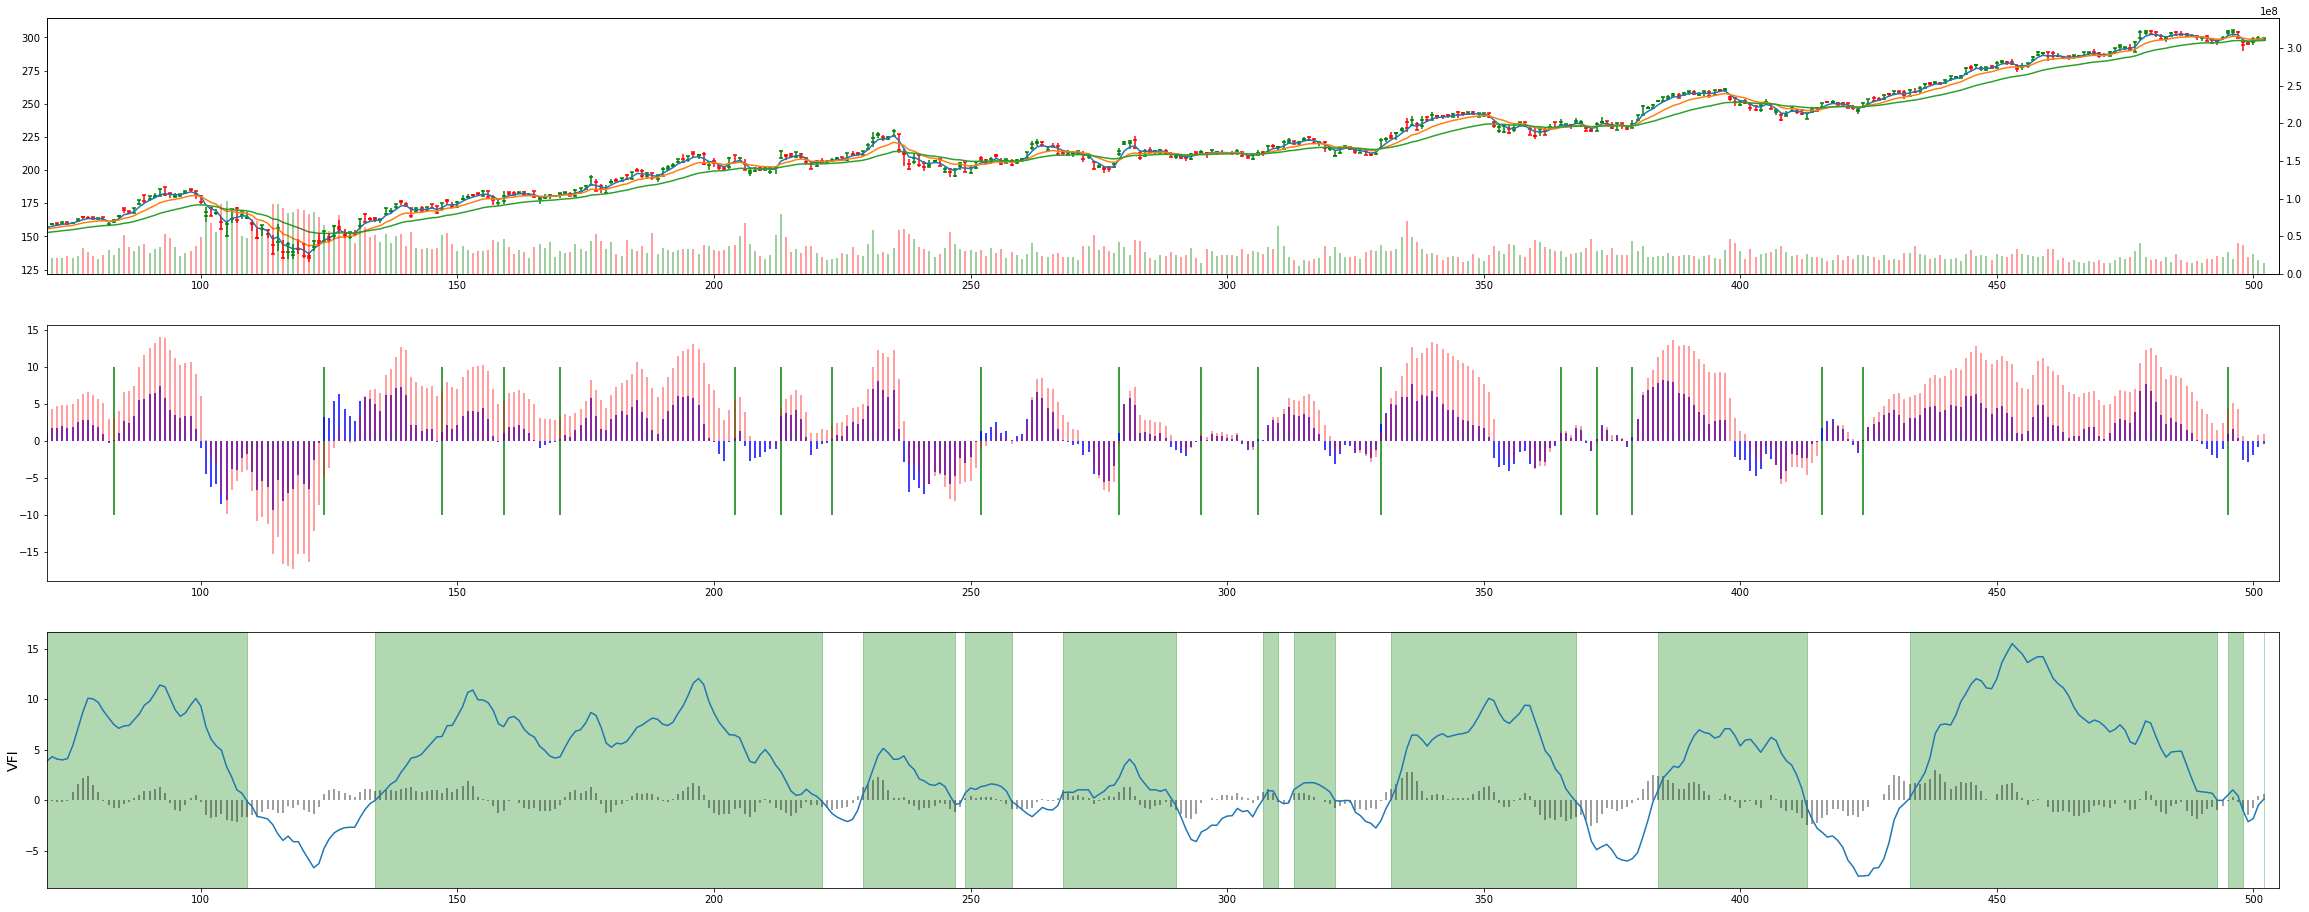

In [80]:
fig, ax = plt.subplots(nrows=3, figsize=(40,16))

axy = ax[0].twinx()
ind.plot_candlestick(ax[0], axy, stock)
ax[0].plot(ind.ema(stock.data, 3, price="Typical")["EMA"])
ax[0].plot(ind.ema(stock.data, 10, price="Close")["EMA"])
ax[0].plot(ind.ema(stock.data, 26, price="Close")["EMA"])
ax[0].set_xlim([70, 505])

ax[1].vlines(np.where(bsig==1), -10,10, "g")
ax[1].vlines(stock.data.index, 0, bcurve, "b")
ax[1].vlines(stock.data.index, 0, ccurve, "r", alpha=0.5)
ax[1].set_xlim([70, 505])

# plot VFI
vfi = ind.vfi(stock.data, period=30, coef=0.2, vcoef=1.5)
ax[2].plot(vfi["vfi"])
ax[2].vlines(stock.data.index, 0, vfi["histogram"], "k", alpha=0.5)
ax[2].set_xlim([70, 505])
ax[2].set_ylabel("VFI", fontsize=14)
# bullish / bearish VFI
# bullish vfi > 0 and histo > 0
# bearish vfi < 0
mask = (vfi["vfi"] > 0).to_numpy()
# mask = np.logical_or(mask, (vfi["histogram"] > 0).to_numpy())
bullstart = np.where(np.concatenate((np.array([0]), (mask[:-1] < mask[1:]))).astype("int")==1)[0]
bullend = np.where(np.concatenate((np.array([0]), (mask[:-1] > mask[1:]))).astype("int")==1)[0]
for i, val in enumerate(bullstart):
    if i == len(bullend):
        ax[2].axvspan(val, stock.data.index[-1], alpha=0.3, color="g")
    else:
        ax[2].axvspan(val, bullend[i], alpha=0.3, color="g")


In [ ]:
# analysis of buy signals
postions = np.where()